In [1]:
# 필요한 라이브러리 설치 및 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#데이터 로드
df_benign =  './preprocessed_data/pypi/pypi_ast_analysis_benign.csv' # benign
df_mal = './preprocessed_data/pypi/pypi_ast_analysis_malicious.csv' #malicious

In [3]:
df_benign = pd.read_csv(df_benign)

In [4]:
df_mal = pd.read_csv(df_mal)

In [5]:
df_benign.head()

,file name,entropy,BaseHTTPServer.HTTPServer,DocXMLRPCServer.DocXMLRPCServer,FTP.retrbinary,FTP.retrlines,FTP.storbinary,FTP.storlines,HTTPConnection.request,HTTPConnection.send,...,xmlrpc.client.DateTime.encode,xmlrpc.client.ServerProxy,xmlrpc.server.DocXMLRPCServer,xmlrpc.server.SimpleXMLRPCServer,xmlrpclib.ServerProxy,zipapp,zipfile,zipfile.ZipFile,zipimport.zipimporter,zlib
0,./data/pypi/benign/setup_helper.py,0.748544,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,./data/pypi/benign/dev.py,0.722306,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,./data/pypi/benign/gensetup.py,0.848151,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,./data/pypi/benign/setup.py,0.858386,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,./data/pypi/benign/conftest.py,0.943474,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_benign.shape

(39132, 527)

In [7]:
df_mal.head()

,file name,entropy,BaseHTTPServer.HTTPServer,DocXMLRPCServer.DocXMLRPCServer,FTP.retrbinary,FTP.retrlines,FTP.storbinary,FTP.storlines,HTTPConnection.request,HTTPConnection.send,...,xmlrpc.client.DateTime.encode,xmlrpc.client.ServerProxy,xmlrpc.server.DocXMLRPCServer,xmlrpc.server.SimpleXMLRPCServer,xmlrpclib.ServerProxy,zipapp,zipfile,zipfile.ZipFile,zipimport.zipimporter,zlib
0,./data/pypi/malicious/malicious-package-exampl...,0.820153,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,./data/pypi/malicious/pypi_malregistry-main/sc...,0.586384,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,./data/pypi/malicious/pypi_malregistry-main/sc...,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,./data/pypi/malicious/pypi_malregistry-main/op...,0.586508,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,./data/pypi/malicious/pypi_malregistry-main/op...,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_mal.shape

(35672, 527)

In [9]:
df_benign['label'] = 0
df_mal['label'] = 1

In [10]:
df = pd.concat([df_benign, df_mal], ignore_index=True)
df.shape

(74804, 528)

In [11]:
df_benign['label'].value_counts()

label
0    39132
Name: count, dtype: int64

In [12]:
df_mal['label'].value_counts()

label
1    35672
Name: count, dtype: int64

In [13]:
df.head()

,file name,entropy,BaseHTTPServer.HTTPServer,DocXMLRPCServer.DocXMLRPCServer,FTP.retrbinary,FTP.retrlines,FTP.storbinary,FTP.storlines,HTTPConnection.request,HTTPConnection.send,...,xmlrpc.client.ServerProxy,xmlrpc.server.DocXMLRPCServer,xmlrpc.server.SimpleXMLRPCServer,xmlrpclib.ServerProxy,zipapp,zipfile,zipfile.ZipFile,zipimport.zipimporter,zlib,label
0,./data/pypi/benign/setup_helper.py,0.748544,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,./data/pypi/benign/dev.py,0.722306,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,./data/pypi/benign/gensetup.py,0.848151,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,./data/pypi/benign/setup.py,0.858386,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,./data/pypi/benign/conftest.py,0.943474,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.count()

file name                          74804
entropy                            74804
BaseHTTPServer.HTTPServer          74804
DocXMLRPCServer.DocXMLRPCServer    74804
FTP.retrbinary                     74804
                                   ...  
zipfile                            74804
zipfile.ZipFile                    74804
zipimport.zipimporter              74804
zlib                               74804
label                              74804
Length: 528, dtype: int64

In [15]:
# -1 레이블 제외
#df = df[df['Label'] != -1]

# 데이터와 레이블 분리
X = df.drop(['label', 'file name'], axis=1)  # 'Label'과 'Filename' 열을 제외한 모든 데이터
y = df['label']  # 'Label' 열

Text(0.5, 1.0, 'label')

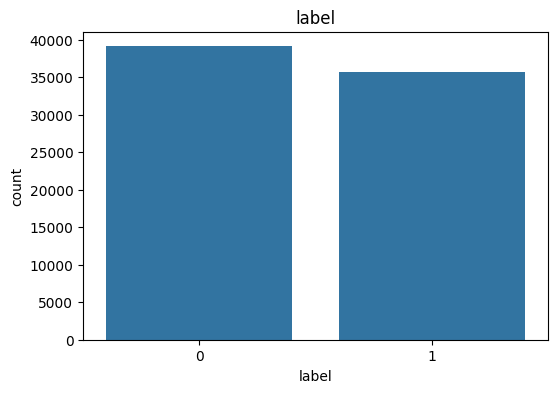

In [16]:
# 타겟 변수 분포_ 1:1임을 알 수 있다.
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('label')

In [17]:
df.isnull().sum() # 결측값 확인

file name                          0
entropy                            0
BaseHTTPServer.HTTPServer          0
DocXMLRPCServer.DocXMLRPCServer    0
FTP.retrbinary                     0
                                  ..
zipfile                            0
zipfile.ZipFile                    0
zipimport.zipimporter              0
zlib                               0
label                              0
Length: 528, dtype: int64

In [18]:
# NaN 값을 포함하는 행 제거
df = df.dropna()
df.shape

(74804, 528)

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN values with the median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# SMOTE를 사용하여 오버샘플링
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled = X, y

# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [20]:
# X_resampled.shape # 2407-> 3798개로 증가했음을 알 수 있다.

In [21]:
# xgboost 모델 생성 및 학습
model = XGBClassifier(max_depth=30, random_state=42)
model.fit(X_train, y_train)

# 교차 검증 수행
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

Cross-validation scores: [0.8585656  0.85248312 0.75262349 0.73651494 0.75220588]
Average CV score: 0.7904786071236194


In [22]:
# 테스트 세트에 대한 모델 성능 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, digits=3)  # 여기서 digits 매개변수를 활용해 셋째 자리까지 나타낼 수 있어

print("xgb 모델 평가")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

xgb 모델 평가
Accuracy: 0.8157
Classification Report:
              precision    recall  f1-score   support

           0      0.816     0.836     0.826      7835
           1      0.815     0.793     0.804      7126

    accuracy                          0.816     14961
   macro avg      0.816     0.815     0.815     14961
weighted avg      0.816     0.816     0.816     14961



In [23]:
# 피처 중요도 계산 및 출력
feature_importances = model.feature_importances_
feature_names = X_resampled.columns
importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importances_df = importances_df.sort_values('importance', ascending=False)


Top 50 Feature Importances:
                       feature  importance
446           subprocess.Popen    0.189388
320                  os.system    0.076661
400                     socket    0.046193
153                       http    0.043198
56     asyncio.open_connection    0.035691
132                filecmp.cmp    0.028510
128                       exec    0.026589
465               tarfile.open    0.023512
475                  threading    0.022894
113              ctypes.WinDLL    0.022731
131                    filecmp    0.019987
68            base64.b64decode    0.017269
436                        ssl    0.016466
99   concurrent.futures.Future    0.015991
328                    pathlib    0.013894
376                    setattr    0.010444
271                os.getlogin    0.009898
127                       eval    0.009667
37                  __import__    0.008868
287                    os.pipe    0.008723
163                    imaplib    0.008229
382               shutil.c

In [ ]:

print("Top 50 Feature Importances:")
print(importances_df.head(50))

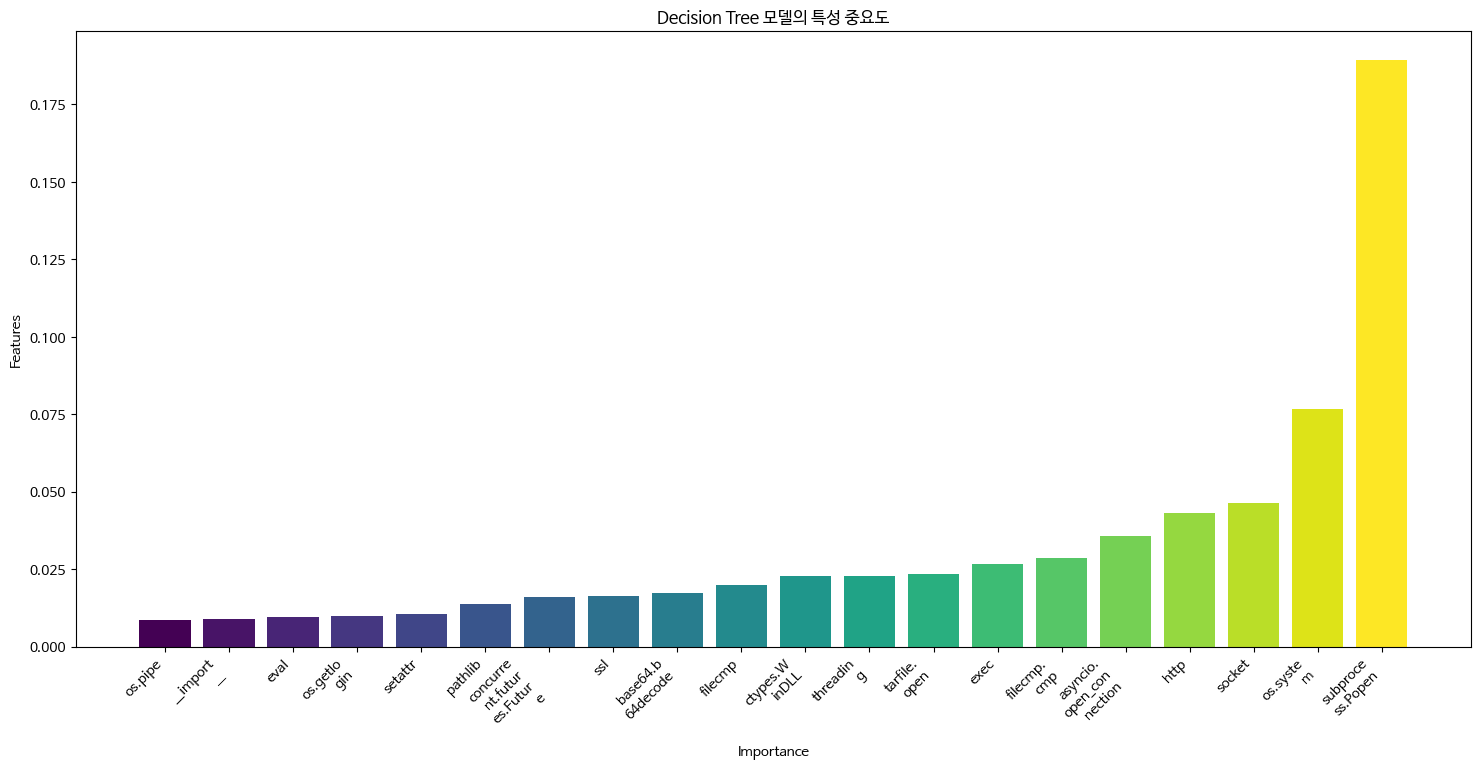

In [24]:
# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 가정: feature_importances와 feature_names이 정의되어 있음
# feature_importances = ...
# feature_names = ...

def split_long_words(s, n):
    """주어진 문자열 s를 길이 n마다 줄바꿈 문자를 삽입하여 반환"""
    return '\n'.join([s[i:i+n] for i in range(0, len(s), n)])

# 상위 20개 특성 선택
indices = np.argsort(feature_importances)[-20:]

# 색상 맵 설정
cmap = plt.cm.viridis  # 또는 plt.cm.tab20 등 다양한 colormap 사용 가능
colors = cmap(np.linspace(0, 1, len(indices)))

# 특성 이름을 지정된 길이마다 줄바꿈 처리
max_length = 8
split_feature_names = [split_long_words(feature_names[i], max_length) for i in indices]

plt.figure(figsize=(18, 8))
plt.title(f"Decision Tree 모델의 특성 중요도")
plt.bar(range(len(indices)), feature_importances[indices], color=colors, align='center')
plt.xticks(range(len(indices)), split_feature_names, rotation=45, ha='right')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## **검증코드**

In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pandas as pd

# 검증을 위해 기존 데이터에서 500개를 분리하여 검증용 데이터로 저장시킴.


# 검증용 데이터 분리
validation_data = pd.read_csv('./preprocessed_data/pypi/pypi_ast_analysis_validation.csv') # 검증 데이터 csv명 추가하기.
# validation_data.head()
# print(validation_data.columns)
# validation_labels = validation_data['Label']
validation_FileName = validation_data['file name']
validation_features = validation_data.drop(columns=['file name'])

In [33]:
validation_features.head()

,entropy,BaseHTTPServer.HTTPServer,DocXMLRPCServer.DocXMLRPCServer,FTP.retrbinary,FTP.retrlines,FTP.storbinary,FTP.storlines,HTTPConnection.request,HTTPConnection.send,IMAP4.send,...,xmlrpc.client.DateTime.encode,xmlrpc.client.ServerProxy,xmlrpc.server.DocXMLRPCServer,xmlrpc.server.SimpleXMLRPCServer,xmlrpclib.ServerProxy,zipapp,zipfile,zipfile.ZipFile,zipimport.zipimporter,zlib
0,0.715846,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.690789,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.880976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.807379,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# 검증 데이터에 대한 악성 확률 예측
y_pred_prob = model.predict_proba(validation_features)[:, 1]
# 결과 출력
for i, prob in enumerate(y_pred_prob):
    print(f"Validation Sample {i}: Malignant Probability = {prob:.4f}")


Validation Sample 0: Malignant Probability = 0.0068
Validation Sample 1: Malignant Probability = 0.6963
Validation Sample 2: Malignant Probability = 0.1762
Validation Sample 3: Malignant Probability = 0.4382
Validation Sample 4: Malignant Probability = 0.3466
Validation Sample 5: Malignant Probability = 0.0615
Validation Sample 6: Malignant Probability = 0.6465
Validation Sample 7: Malignant Probability = 0.0337
Validation Sample 8: Malignant Probability = 0.0031
Validation Sample 9: Malignant Probability = 0.0252
Validation Sample 10: Malignant Probability = 0.1350
Validation Sample 11: Malignant Probability = 0.2053
Validation Sample 12: Malignant Probability = 0.6963
Validation Sample 13: Malignant Probability = 0.6963
Validation Sample 14: Malignant Probability = 0.6963
Validation Sample 15: Malignant Probability = 0.4128
Validation Sample 16: Malignant Probability = 0.0770
Validation Sample 17: Malignant Probability = 0.1254
Validation Sample 18: Malignant Probability = 0.3349
Val

In [35]:
import pandas as pd

# 악성 확률이 0.9 이상인 파일 정보를 담을 데이터프레임 생성
# detection_df = pd.DataFrame(columns=['file name', 'Malignant Probability', 'URL', 'package'])
detection_df = pd.DataFrame(columns=['file name', 'Malignant Probability'])

# for filename, prob, url, package in zip(validation_FileName, y_pred_prob, validation_data['URL'], validation_data['package']):
for filename, prob in zip(validation_FileName, y_pred_prob):
    if prob >= 0.95:
        # 악성 확률이 0.95 이상인 경우에만 데이터프레임에 추가
        detection_df = pd.concat([detection_df, pd.DataFrame({'file name': [filename], 'Malignant Probability': [prob]})], ignore_index=True)

detection_df.to_csv('./validation_result/result.csv', index=False)


In [36]:
detection_df = pd.read_csv('./validation_result/result.csv')
# print(detection_df)

                                             file name  Malignant Probability
0    ./data/pypi/validation/evmole/evmole-0.3.6/evm...               0.969995
1    ./data/pypi/validation/ilorest/ilorest-5.1.0.0...               0.960180
2    ./data/pypi/validation/ilorest/ilorest-5.1.0.0...               0.962987
3    ./data/pypi/validation/ilorest/ilorest-5.1.0.0...               0.972645
4    ./data/pypi/validation/pedhosp/pedhosp-0.0.3/s...               0.993893
..                                                 ...                    ...
264  ./data/pypi/validation/emso-metadata-harmonize...               0.987430
265  ./data/pypi/validation/vistudio-image-analysis...               0.967612
266  ./data/pypi/validation/vistudio-image-analysis...               0.960180
267  ./data/pypi/validation/django4-background-task...               0.981266
268  ./data/pypi/validation/hestia-earth-models/hes...               0.983439

[269 rows x 2 columns]
